In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [7]:
data=pd.read_csv('intern_dataset.csv',parse_dates=['Time'])

## Creating copy for our data set

In [8]:
df_tmp=data.copy()

In [9]:
df_tmp.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [10]:
df_tmp.describe()

,Signal1,Signal2
count,542688.000000,542688.000000
mean,31312.169055,0.314616
std,12937.103028,0.183103
min,-2934.328327,0.123263
25%,23253.113384,0.162470
50%,30424.936825,0.246228
75%,38824.548742,0.483007
max,67692.652022,0.945257


In [11]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542688 entries, 0 to 542687
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Time     542688 non-null  datetime64[ns]
 1   Signal1  542688 non-null  float64       
 2   Signal2  542688 non-null  float64       
 3   Label    542687 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 16.6+ MB


##  Checking for null values

In [13]:
df_tmp.isna().sum()

Time       0
Signal1    0
Signal2    0
Label      1
dtype: int64

## Removing the row containing null value

In [14]:
df_tmp.dropna(axis=0,inplace=True)

In [15]:
df_tmp.isna().sum()

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

## Checking the valuecounts for each label

In [16]:
df_tmp.Label.value_counts()

A    318000
C    192000
B     32687
Name: Label, dtype: int64

## Processing the data

In [19]:
df_tmp['Year']=df_tmp.Time.dt.year
df_tmp['month']=df_tmp.Time.dt.month
df_tmp['day']=df_tmp.Time.dt.day
df_tmp['dayofweek']=df_tmp.Time.dt.dayofweek
df_tmp['hour']=df_tmp.Time.dt.hour
df_tmp['minutes']=df_tmp.Time.dt.minute
df_tmp['seconds']=df_tmp.Time.dt.second

In [20]:
df_tmp.head()

,Time,Signal1,Signal2,Label,Year,month,day,dayofweek,hour,minutes,seconds
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A,2017,8,14,0,11,37,49
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A,2017,8,14,0,11,37,49
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A,2017,8,14,0,11,37,49
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A,2017,8,14,0,11,37,49
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A,2017,8,14,0,11,37,49


In [21]:
df_tmp.drop(['Time'],axis=1,inplace=True)

In [22]:
df_tmp.head()

,Signal1,Signal2,Label,Year,month,day,dayofweek,hour,minutes,seconds
0,33668.091913,0.856726,A,2017,8,14,0,11,37,49
1,32564.903040,0.856705,A,2017,8,14,0,11,37,49
2,31454.043305,0.856683,A,2017,8,14,0,11,37,49
3,30335.387166,0.856659,A,2017,8,14,0,11,37,49
4,29207.142938,0.856634,A,2017,8,14,0,11,37,49


## Converting labels into catogorical values

In [30]:
df_tmp['Label']=pd.Categorical(df_tmp['Label']).codes+1

In [31]:
df_tmp.head()

,Signal1,Signal2,Label,Year,month,day,dayofweek,hour,minutes,seconds
0,33668.091913,0.856726,1,2017,8,14,0,11,37,49
1,32564.903040,0.856705,1,2017,8,14,0,11,37,49
2,31454.043305,0.856683,1,2017,8,14,0,11,37,49
3,30335.387166,0.856659,1,2017,8,14,0,11,37,49
4,29207.142938,0.856634,1,2017,8,14,0,11,37,49


## visualizing classes one by one
* For class A

In [32]:
from sklearn.decomposition import PCA 

In [43]:
pca = PCA(3) 

pca.fit(df_tmp.drop('Label',axis=1)[df_tmp['Label']==1]) 
  
pca_data = pd.DataFrame(pca.transform(df_tmp.drop('Label',axis=1)[df_tmp['Label']==1])) 

  

In [44]:
from matplotlib import colors as mcolors 
import math 

In [45]:
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   

In [46]:
clusters=7
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

## Complexity For Class A

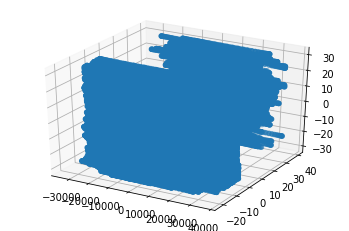

In [49]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2])
   
   

plt.show()

## **For Class B**

In [50]:
pca = PCA(3) 

pca.fit(df_tmp.drop('Label',axis=1)[df_tmp['Label']==2]) 
  
pca_data = pd.DataFrame(pca.transform(df_tmp.drop('Label',axis=1)[df_tmp['Label']==2])) 


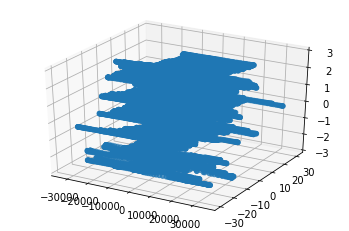

In [51]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2])
   
   

plt.show()

In [53]:
pca = PCA(3) 

pca.fit(df_tmp.drop('Label',axis=1)[df_tmp['Label']==3]) 
  
pca_data = pd.DataFrame(pca.transform(df_tmp.drop('Label',axis=1)[df_tmp['Label']==2])) 

## **For Class C**

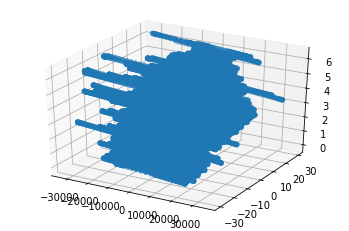

In [54]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2])
   
   

plt.show()

# **From the above three figures we could understand the comlpexity for each of out labeled classes**